# Importations

In [54]:
import pandas as pd
import pickle as pk
import numpy as np
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,precision_score,recall_score,f1_score,precision_recall_curve
from imblearn.over_sampling import SMOTE


# Préparation des données

#### Importation

In [55]:
data_prof = pd.read_csv('Data_Arbre.csv')

In [56]:
cols = data_prof.columns
# cols

Apprentissage sur l'ensemble de la base ou sur "essouche" / "non essouche"

In [57]:
# index = data_prof[(data_prof["fk_arb_etat"] == "SUPPRIMÉ") | (data_prof["fk_arb_etat"] == "ABATTU") | (data_prof["fk_arb_etat"] == "EN PLACE") | (data_prof["fk_arb_etat"] == "REMPLACÉ")].index
# data_prof.drop(index, inplace=True)

Liste des différentes colonnes par type

In [58]:
categorielle = ["clc_quartier","clc_secteur","fk_stadedev","fk_port","fk_pied","fk_situation","fk_nomtech","villeca","feuillage"]
numerique = ["longitude","latitude","haut_tot","haut_tronc","tronc_diam","age_estim","fk_prec_estim","clc_nbr_diag"]
# numerique = ["haut_tot","haut_tronc","tronc_diam","age_estim","fk_prec_estim","clc_nbr_diag"]
binaire = ["fk_arb_etat","remarquable"]
revet = ["fk_revetement"]
# len(categorielle)+len(numerique)+len(binaire)

In [59]:
data_num = data_prof[numerique]

#### Traitement valeur numerique -> StanardScaler

Scaler pour mettre toute les données numérique sur la même echelle

In [60]:
scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(data_num)

In [61]:
# data_num_scaled = pd.DataFrame(data_num_scaled,columns=numerique)
data_num_scaled = pd.DataFrame(data_num_scaled,columns=numerique)

In [62]:
data_num_scaled

,longitude,latitude,haut_tot,haut_tronc,tronc_diam,age_estim,fk_prec_estim,clc_nbr_diag
0,-0.121047,-1.027327,-0.920963,-0.46555,-1.148795,-0.968413,-0.687534,-0.279804
1,-1.427386,0.976923,0.213100,-1.02441,0.934743,0.822235,0.357548,-0.279804
2,-0.396705,-0.642658,0.051091,0.09331,0.189412,-0.200993,0.357548,-0.279804
3,0.478338,1.012295,0.699128,0.09331,0.765349,0.822235,-1.314583,-0.279804
4,0.587422,0.692942,-1.082973,-0.46555,1.104136,0.310621,-1.314583,-0.279804
...,...,...,...,...,...,...,...,...
7404,-0.762150,-0.241781,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804
7405,-0.766702,-0.243069,-1.406991,-0.46555,-1.521460,-1.582349,-1.523599,-0.279804
7406,0.129538,0.881435,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804
7407,-0.224781,-0.307587,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804


#### Valeur catégorielle -> OneHotEncoder

OneHotEncoder pour faire une colonne pour chaque elements different des valeur catégorielle. Exemple, 1 colonne par quartier

In [63]:
hot = OneHotEncoder(sparse_output=False)
hot_df = pd.DataFrame(hot.fit_transform(data_prof[categorielle]), columns=hot.get_feature_names_out(categorielle))

In [64]:
hot_df

,clc_quartier_HARLY,clc_quartier_OMISSY,clc_quartier_Quartier Remicourt,clc_quartier_Quartier Saint-Jean,clc_quartier_Quartier Saint-Martin - Oëstres,clc_quartier_Quartier de Neuville,clc_quartier_Quartier de l'Europe,clc_quartier_Quartier du Centre-Ville,clc_quartier_Quartier du Vermandois,clc_quartier_Quartier du faubourg d'Isle,...,fk_nomtech_TILTOM,fk_nomtech_ULMJAP,fk_nomtech_ULMMIN,fk_nomtech_ULMRES,fk_nomtech_ULMRESreb,fk_nomtech_ULMRESsap,villeca_CASQ,villeca_VILLE,feuillage_Conifère,feuillage_Feuillu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7406,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Données booléen -> passage manuel à 0 ou 1 en fct des besoins

Passage des booléen à 0 ou 1

In [65]:
data_bin = data_prof[binaire]

# #Essouche ou non
# data_bin.loc[data_bin["fk_arb_etat"] == "Essouché", "fk_arb_etat"] = 1
# data_bin.loc[data_bin["fk_arb_etat"] != 1, "fk_arb_etat"] = 0
# data_bin.fk_arb_etat = data_bin.fk_arb_etat.astype(int)
# # data_bin.fk_arb_etat.value_counts()


# #Remarquable ou non
# data_bin.loc[data_bin["remarquable"] == "Oui", "remarquable"] = 1
# data_bin.loc[data_bin["remarquable"] != 1, "remarquable"] = 0
# data_bin.remarquable = data_bin.remarquable.astype(int)

In [66]:
data_bin

,fk_arb_etat,remarquable
0,EN PLACE,Non
1,EN PLACE,Non
2,REMPLACÉ,Non
3,EN PLACE,Non
4,Essouché,Non
...,...,...
7404,EN PLACE,Non
7405,EN PLACE,Non
7406,EN PLACE,Non
7407,EN PLACE,Non


Rassemblement des données

In [67]:
data = pd.concat([data_num_scaled, hot_df, data_bin], axis=1)

In [68]:
data

,longitude,latitude,haut_tot,haut_tronc,tronc_diam,age_estim,fk_prec_estim,clc_nbr_diag,clc_quartier_HARLY,clc_quartier_OMISSY,...,fk_nomtech_ULMMIN,fk_nomtech_ULMRES,fk_nomtech_ULMRESreb,fk_nomtech_ULMRESsap,villeca_CASQ,villeca_VILLE,feuillage_Conifère,feuillage_Feuillu,fk_arb_etat,remarquable
0,-0.121047,-1.027327,-0.920963,-0.46555,-1.148795,-0.968413,-0.687534,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,EN PLACE,Non
1,-1.427386,0.976923,0.213100,-1.02441,0.934743,0.822235,0.357548,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,EN PLACE,Non
2,-0.396705,-0.642658,0.051091,0.09331,0.189412,-0.200993,0.357548,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,REMPLACÉ,Non
3,0.478338,1.012295,0.699128,0.09331,0.765349,0.822235,-1.314583,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,EN PLACE,Non
4,0.587422,0.692942,-1.082973,-0.46555,1.104136,0.310621,-1.314583,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Essouché,Non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,-0.762150,-0.241781,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,EN PLACE,Non
7405,-0.766702,-0.243069,-1.406991,-0.46555,-1.521460,-1.582349,-1.523599,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,EN PLACE,Non
7406,0.129538,0.881435,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,EN PLACE,Non
7407,-0.224781,-0.307587,-1.406991,-0.46555,-1.521460,-1.480027,-1.523599,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,EN PLACE,Non


In [69]:
index = data[(data["fk_arb_etat"] == "SUPPRIMÉ") | (data["fk_arb_etat"] == "ABATTU") | (data["fk_arb_etat"] == "EN PLACE") | (data["fk_arb_etat"] == "REMPLACÉ")].index
data.drop(index, inplace=True)

In [70]:
data

,longitude,latitude,haut_tot,haut_tronc,tronc_diam,age_estim,fk_prec_estim,clc_nbr_diag,clc_quartier_HARLY,clc_quartier_OMISSY,...,fk_nomtech_ULMMIN,fk_nomtech_ULMRES,fk_nomtech_ULMRESreb,fk_nomtech_ULMRESsap,villeca_CASQ,villeca_VILLE,feuillage_Conifère,feuillage_Feuillu,fk_arb_etat,remarquable
4,0.587422,0.692942,-1.082973,-0.465550,1.104136,0.310621,-1.314583,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Essouché,Non
73,-1.600420,-0.649680,0.051091,0.093310,0.934743,0.822235,0.357548,2.334405,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Essouché,Non
76,-1.586969,-0.635455,0.213100,0.652169,0.850046,0.822235,0.357548,4.948615,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Essouché,Non
92,-0.026502,-0.123683,1.995200,3.446468,2.374585,2.357076,2.447711,4.948615,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Essouché,Non
104,-0.054271,-0.153571,1.347164,6.240767,1.273529,2.357076,2.447711,4.948615,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Essouché,Non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6886,0.084954,-0.281967,-0.434936,0.093310,-0.335707,-0.456799,-0.687534,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Essouché,Non
6887,0.082756,-0.284428,-0.434936,0.093310,-0.318768,-0.456799,-0.687534,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Essouché,Non
6888,0.087190,-0.286481,-0.434936,0.652169,-0.115496,-0.456799,-0.687534,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Essouché,Non
6977,-1.912441,-1.441844,-1.082973,-0.465550,-1.352066,-1.224220,-1.314583,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Non essouché,Non


In [71]:
# Essouche ou non
data.loc[data["fk_arb_etat"] == "Essouché", "fk_arb_etat"] = 1
data.loc[data["fk_arb_etat"] != 1, "fk_arb_etat"] = 0
data.fk_arb_etat = data.fk_arb_etat.astype(int)
# data.fk_arb_etat.value_counts()


# Remarquable ou non
data.loc[data["remarquable"] == "Oui", "remarquable"] = 1
data.loc[data["remarquable"] != 1, "remarquable"] = 0
data.remarquable = data.remarquable.astype(int)

In [72]:
data

,longitude,latitude,haut_tot,haut_tronc,tronc_diam,age_estim,fk_prec_estim,clc_nbr_diag,clc_quartier_HARLY,clc_quartier_OMISSY,...,fk_nomtech_ULMMIN,fk_nomtech_ULMRES,fk_nomtech_ULMRESreb,fk_nomtech_ULMRESsap,villeca_CASQ,villeca_VILLE,feuillage_Conifère,feuillage_Feuillu,fk_arb_etat,remarquable
4,0.587422,0.692942,-1.082973,-0.465550,1.104136,0.310621,-1.314583,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0
73,-1.600420,-0.649680,0.051091,0.093310,0.934743,0.822235,0.357548,2.334405,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0
76,-1.586969,-0.635455,0.213100,0.652169,0.850046,0.822235,0.357548,4.948615,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0
92,-0.026502,-0.123683,1.995200,3.446468,2.374585,2.357076,2.447711,4.948615,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0
104,-0.054271,-0.153571,1.347164,6.240767,1.273529,2.357076,2.447711,4.948615,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6886,0.084954,-0.281967,-0.434936,0.093310,-0.335707,-0.456799,-0.687534,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0
6887,0.082756,-0.284428,-0.434936,0.093310,-0.318768,-0.456799,-0.687534,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0
6888,0.087190,-0.286481,-0.434936,0.652169,-0.115496,-0.456799,-0.687534,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0
6977,-1.912441,-1.441844,-1.082973,-0.465550,-1.352066,-1.224220,-1.314583,-0.279804,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0


#### Division en base de train et test

In [73]:
X_data = data.drop("fk_arb_etat",axis=1)
X_data.columns = X_data.columns.astype(str)
Y_data = data["fk_arb_etat"]
# print(X_data)
# print(Y_data)

In [74]:
X_train_1, X_test, Y_train_1, Y_test = train_test_split(X_data,Y_data,test_size=0.2,random_state=42)

Smote pour remettre à niveau la minorité dans la base de train

In [75]:
#Smote ?
sm = SMOTE(random_state=42, n_jobs=-1, sampling_strategy=0.25)
# sm = SMOTE(random_state=42, n_jobs=-1)
X_train, Y_train = sm.fit_resample(X_train_1, Y_train_1)

C:\Users\thile\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


# Création du modèle -> RandomForestClassifier

#### Premier modèle avec toutes les features

In [76]:
forest = RandomForestClassifier(n_estimators=250,random_state=42)
forest.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=250, random_state=42)

##### Test

In [77]:
# pred = cross_val_score(forest,X_train,Y_train,cv=5,n_jobs=-1)
# pred.mean()

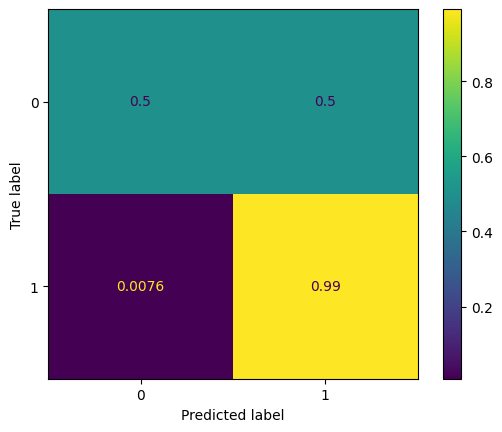

In [78]:
pred_val = cross_val_predict(forest,X_train,Y_train,cv=5,n_jobs=-1)

mat  = confusion_matrix(Y_train, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  forest.classes_)
disp.plot()

#### Feature selection

On récupère les features du modèle pour voir lesquels sont plus importantes que d'autre

In [79]:
feature_names = X_train.columns
# feature_importance_df = pd.DataFrame([])
# feature_importance_df.sort_values(by=0,axis=1,ascending=False,inplace=True)

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': forest.feature_importances_})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
# feature_importance_df
# feature_names

                                Feature  Importance
1                              latitude    0.090318
4                            tronc_diam    0.055848
2                              haut_tot    0.052804
5                             age_estim    0.048773
250     clc_secteur_Stade Paul Debrésie    0.046438
..                                  ...         ...
268                      fk_port_rideau    0.000000
100  clc_secteur_Gymnase Robert Schuman    0.000000
102            clc_secteur_La Boisselle    0.000000
103    clc_secteur_Le million populaire    0.000000
255   clc_secteur_Verger du Parc d'Isle    0.000000

[510 rows x 2 columns]


On récupère les x plus importante pour faire un nouveau modele

In [80]:
top_features = feature_importance_df['Feature'][:20].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


In [81]:
X_train_selected
# X_test_selected

,latitude,tronc_diam,haut_tot,age_estim,clc_secteur_Stade Paul Debrésie,longitude,haut_tronc,clc_quartier_Quartier Saint-Jean,fk_nomtech_PINSYL,feuillage_Feuillu,clc_secteur_Gymnase LEP,feuillage_Conifère,villeca_CASQ,fk_prec_estim,fk_nomtech_JUGREG,fk_nomtech_PYRCOM,clc_secteur_Ecole maternelle des Girondins,villeca_VILLE,fk_situation_Groupe,fk_nomtech_PINNIGnig
0,0.366184,0.595956,-0.434936,0.310621,0.000000,0.889831,-0.465550,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.402630,0.000000,0.0,0.000000,1.000000,1.0,1.0
1,0.431264,-0.928583,-1.082973,-0.712606,0.000000,0.793752,-0.465550,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.687534,0.000000,0.0,0.000000,1.000000,0.0,0.0
2,-0.427518,-0.759190,1.347164,-0.456799,0.000000,1.195737,0.652169,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.357548,0.000000,0.0,0.000000,0.000000,1.0,0.0
3,0.833046,2.289889,2.319219,0.822235,0.000000,-0.057125,0.652169,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.314583,0.000000,0.0,0.000000,1.000000,1.0,0.0
4,-0.704154,-1.301248,-0.272927,-0.200993,0.000000,1.252331,-0.465550,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.357548,0.000000,0.0,0.000000,1.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,1.456760,-1.582267,-1.370434,-0.982844,0.943588,-1.044531,-1.583269,0.943588,0.000000,0.056412,0.000000,0.943588,0.000000,-0.687534,0.000000,0.0,0.000000,1.000000,0.0,0.0
159,1.334541,-0.650948,-0.129064,-0.414336,1.000000,-0.941739,-0.217418,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.067014,0.000000,0.0,0.000000,1.000000,1.0,0.0
160,0.812538,0.402623,-0.213197,-0.185274,0.000000,0.696810,0.093310,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.357548,0.000000,0.0,0.061447,1.000000,0.0,0.0
161,1.332392,-0.250614,-0.272296,-0.200793,0.999221,-1.038551,0.651734,0.999221,0.000000,0.000000,0.000779,1.000000,0.000779,0.357548,0.000000,0.0,0.000000,0.999221,1.0,1.0


#### Featured model

Nouveau modèle avec les feature séléctionné

In [82]:
feat_forest = RandomForestClassifier(n_estimators=250,random_state=42,n_jobs=-1)
feat_forest.fit(X_train_selected,Y_train)

RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state=42)

##### Test d'accuary et matrice de confusion

Test de validation

In [83]:
pred = cross_val_score(feat_forest,X_train_selected,Y_train,cv=5,n_jobs=-1)
pred.mean()

0.8964015151515152

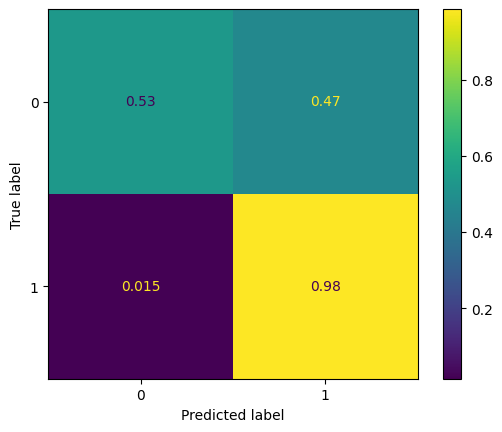

In [84]:
pred_val = cross_val_predict(feat_forest,X_train_selected,Y_train,cv=5,n_jobs=-1)

mat  = confusion_matrix(Y_train, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  feat_forest.classes_)
disp.plot()

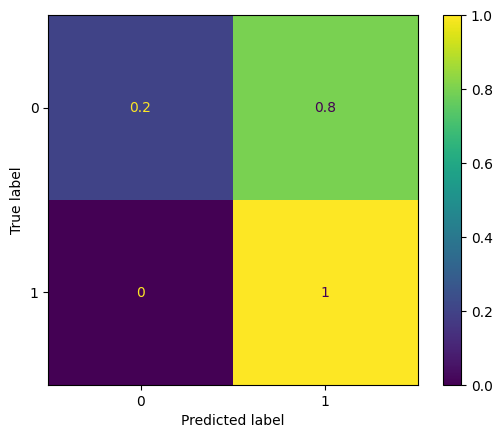

In [85]:
pred_val = feat_forest.predict(X_test_selected)

mat  = confusion_matrix(Y_test, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  feat_forest.classes_)
disp.plot()

##### Hyperparametrage

In [86]:
# print(X_train_selected.shape)
# print(Y_train.shape)

In [87]:
param_grid = { 
    'n_estimators': [i*25 for i in range(1,15)],
    'max_features': ['auto', 'sqrt', 'log2', None],
    # 'max_depth' : [5, 10, 15, None],
    'criterion' :['gini', 'entropy', 'log_loss']
}

In [88]:
# gcv = GridSearchCV(estimator=feat_forest, param_grid=param_grid, cv= 5, n_jobs=-1, scoring='f1')
# gcv.fit(X_train_selected, Y_train)
# gcv.best_params_

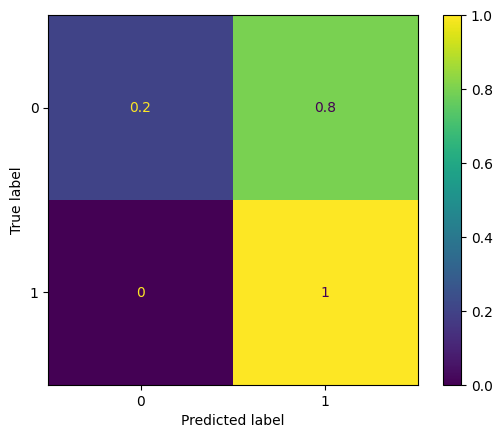

In [89]:
#Test nouveau modele
# grid_model = RandomForestClassifier(random_state=42,n_jobs=-1, **gcv.best_params_)
grid_model = RandomForestClassifier(random_state=42,n_jobs=-1, criterion='entropy', n_estimators=75)
grid_model.fit(X_train_selected,Y_train)

pred_val = grid_model.predict(X_test_selected)

mat  = confusion_matrix(Y_test, pred_val, normalize='true')
mat

disp = ConfusionMatrixDisplay(confusion_matrix = mat,display_labels =  feat_forest.classes_)
disp.plot()

# Pickle

Sauvegarde du modèle, encoder utilisé

In [90]:
# dic = {"model":feat_forest,"features":top_features,"scaler":scaler,"hot":hot, "categorielle":categorielle,"numerique":numerique,"binaire":['remarquable']}
# pk.dump(dic, open('dic_client_3.pkl', 'wb'))


# categorielle = ["clc_quartier","clc_secteur","fk_stadedev","fk_port","fk_pied","fk_situation","fk_nomtech","villeca","feuillage"]
# numerique = ["longitude","latitude","haut_tot","haut_tronc","tronc_diam","age_estim","fk_prec_estim","clc_nbr_diag"]
# binaire = ["fk_arb_etat","remarquable"]
# revet = ["fk_revetement"]

In [91]:
# pk.dump(smoted_model, open('smoted_model_client_3.pkl', 'wb'))